In [1]:
import numpy as np
import json
from pprint import pprint
import matplotlib.pyplot as plt
from collections import defaultdict

plt.rcParams['figure.figsize'] = [16, 8]

In [7]:
#Opening the experiment json
def load_probe_metric_list(fname):
    with open(fname,"r") as rhandle:
        probe_metric_list = json.load(rhandle)
    
    #Converting the metric into usable format
    pdict = defaultdict(list)
    for idx in range(len(probe_metric_list)):
        pdict["angle:m-t0"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic0"])
        pdict["angle:m-t1"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic1"])
        pdict["angle:m-t2"].append(probe_metric_list[idx]["conv_angle_dict"]["main"]["topic2"])
        pdict["acc:main"].append(probe_metric_list[idx]["classifier_acc_dict"]["main"])
        pdict["acc:topic0"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic0"])
        pdict["acc:topic1"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic1"])
        pdict["acc:topic2"].append(probe_metric_list[idx]["classifier_acc_dict"]["topic2"])
    return pdict

In [37]:
#Plotting the results
def plot_the_metrics(pdict):
    #fig,ax = plt.subplots(2,1,gridspec_kw={'width_ratios': [3, 1]})
    fig,ax = plt.subplots(2,1)
    ax[0].plot(pdict["angle:m-t0"],"-o",label="angle:m-t0")
    ax[0].plot(pdict["angle:m-t1"],"-o",label="angle:m-t1")
    ax[0].plot(pdict["angle:m-t2"],"-o",label="angle:m-t2")
    
    
    ax[1].plot(pdict["acc:topic0"],"-o",label="acc:topic0")
    ax[1].plot(pdict["acc:topic1"],"-o",label="acc:topic1")
    ax[1].plot(pdict["acc:topic2"],"-o",label="acc:topic2")
    ax[1].plot(pdict["acc:main"],"-o",label="acc:main")
    
    ax[0].legend()
    ax[0].grid(True)
#     ax[0].set_ylim(0.0,1.0)
    ax[0].set_xlabel("null space removal iteration")
    ax[0].set_ylabel("relative conv angle (multiple of pi)")
    
    ax[1].legend()
    ax[1].grid(True)
#     ax[1].set_ylim(0.0,1.0)
    ax[1].set_xlabel("null space removal iteration")
    ax[1].set_ylabel("Accuracy")
    
    
    plt.show()


def plot_the_metric_grid(pdict_lol,p0_vals,p1_vals,plot):
    '''
    [
        p0: [pdict of this row: varying p1],
        p0: [pdict of this row: varying p1],
        ...
        
        Here we will just plot the validation accuracy
    ]
    '''
    fig,ax = plt.subplots(len(pdict_lol),len(pdict_lol[0]))
    for ridx,pdict_p1 in enumerate(pdict_lol):
        for cidx,pdict in enumerate(pdict_p1):
            if(plot=="acc"):
                ax[ridx,cidx].plot(pdict["acc:main"],"-o",label="acc:main")
                ax[ridx,cidx].plot(pdict["acc:topic0"],"-o",label="acc:topic0")
                ax[ridx,cidx].plot(pdict["acc:topic1"],"-o",label="acc:topic1")
            else:
                ax[ridx,cidx].plot(pdict["angle:m-t0"],"-o",label="angle:m-t0")
                ax[ridx,cidx].plot(pdict["angle:m-t1"],"-o",label="angle:m-t1")
                ax[ridx,cidx].plot(pdict["angle:t0-t1"],"-o",label="angle:t0-t1")
            
            ax[ridx,cidx].legend()
            ax[ridx,cidx].grid(True)
            ax[ridx,cidx].set_ylim(0.0,1.0)
            ax[ridx,cidx].set_xlabel("null space removal iteration")
            ax[ridx,cidx].set_ylabel("Accuracy")
            ax[ridx,cidx].set_title("p0={:0.2f} & p1={:0.2f}".format(p0_vals[ridx],p1_vals[cidx]))
    
    plt.plot()    

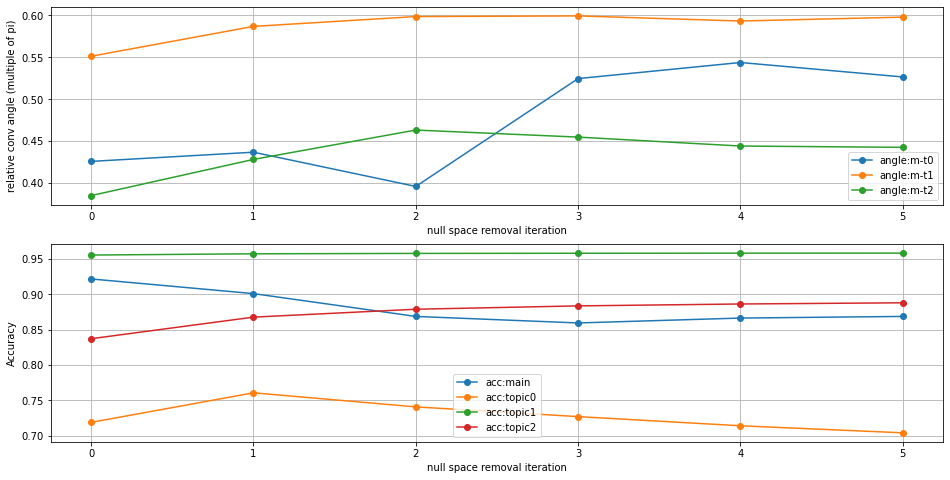

In [25]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct22.inlp.0/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

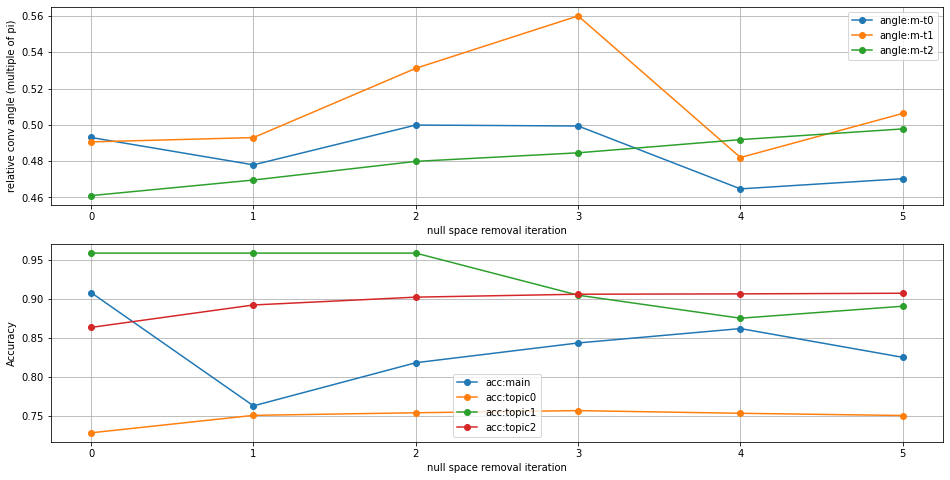

In [26]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct22.inlp.1/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

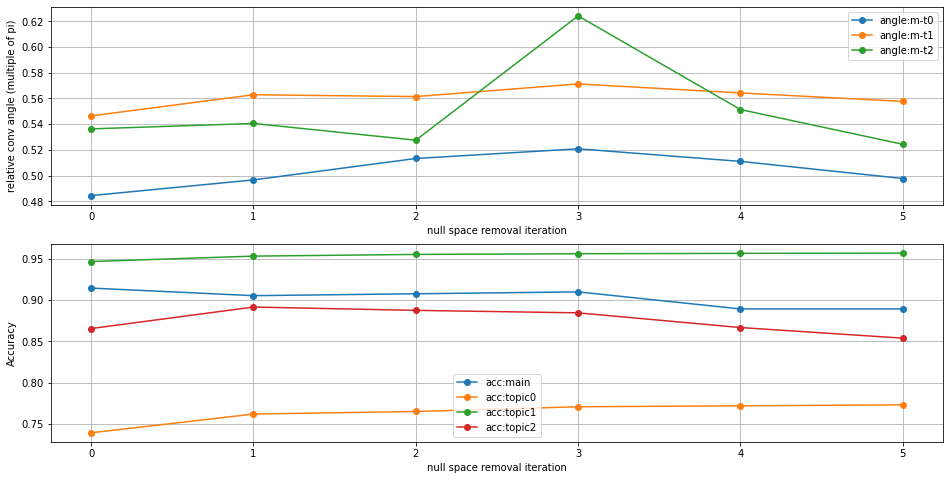

In [27]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct22.inlp.2/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

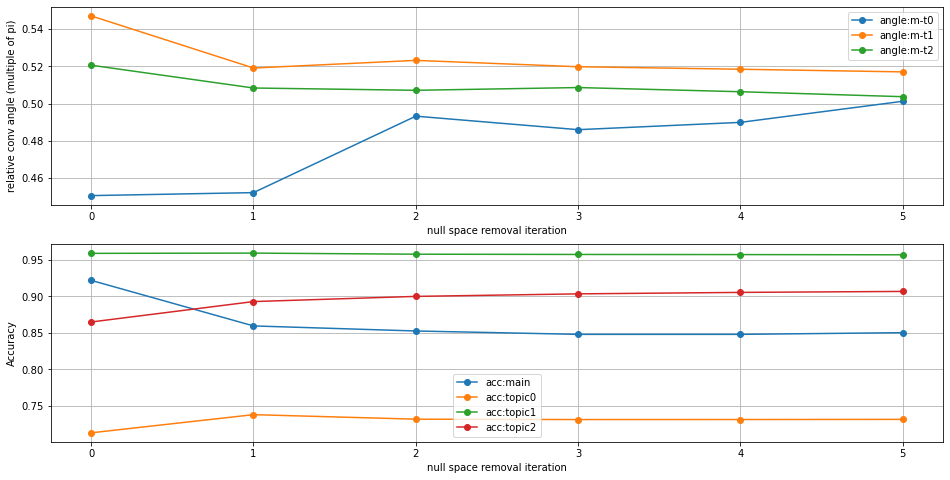

In [28]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct23.inlp.0/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

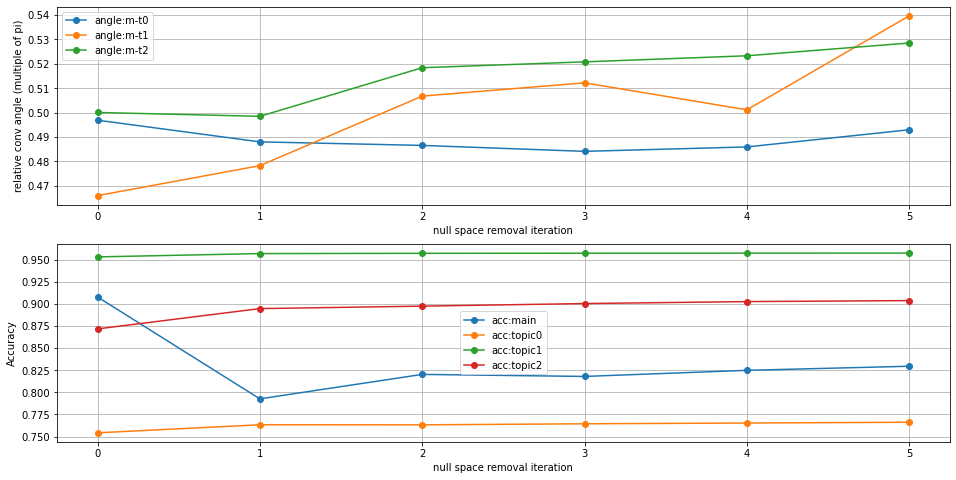

In [29]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct23.inlp.1/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

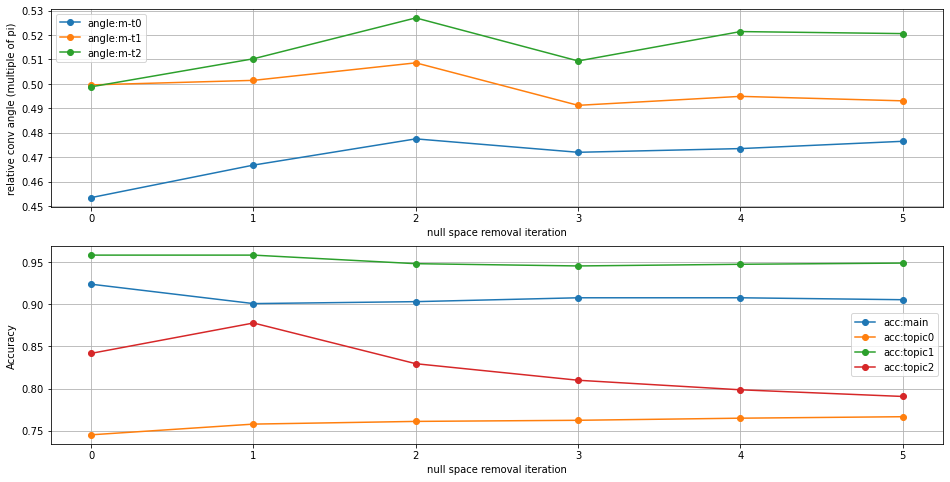

In [30]:
# p0=1.0 , p1=0.8
fname0 = "nlp_logs/ct23.inlp.2/probe_metric_list.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

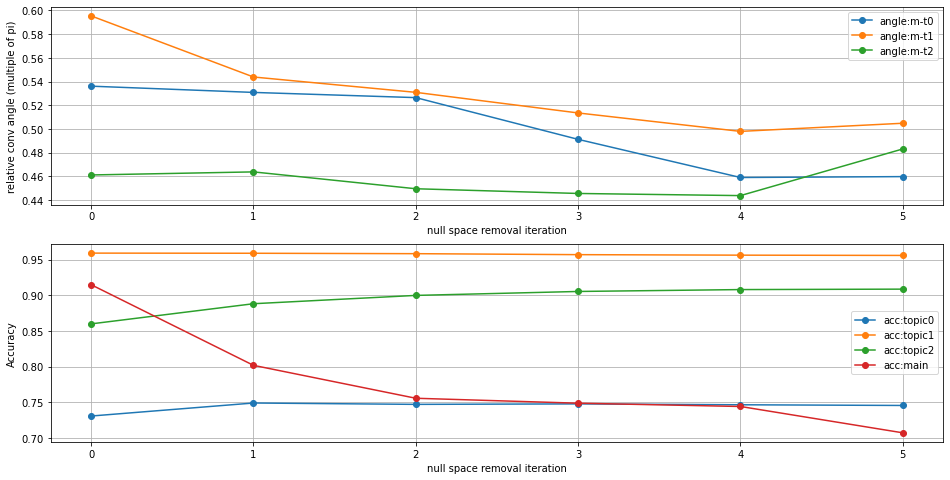

In [38]:
fname0 = "nlp_logs/ct22.inlp.0/probe_metric_list_topic_0.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

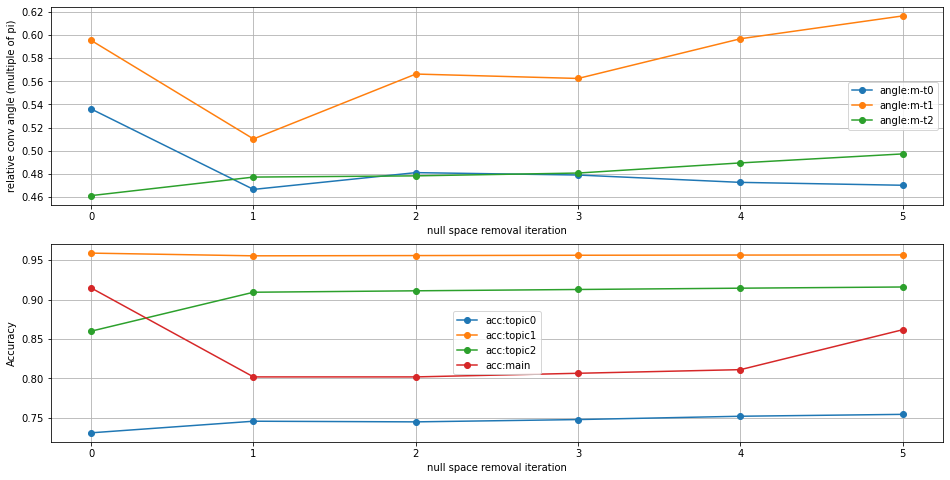

In [42]:
fname0 = "nlp_logs/ct22.inlp.0/probe_metric_list_topic_1.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)

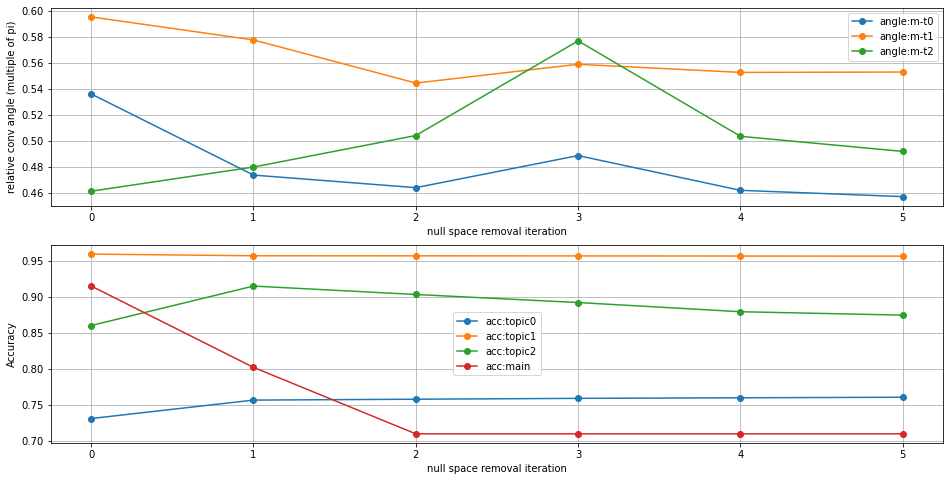

In [45]:
fname0 = "nlp_logs/ct22.inlp.0/probe_metric_list_topic_2.json"
pdict0 = load_probe_metric_list(fname0)
plot_the_metrics(pdict0)